In [1]:
import pandas as pd
import numpy as np
from src.political_ads.Preprocessor import *
from src.political_ads.keyword_filter import *
from src.political_ads.grouper import *

### Creating list with all the page ids of the current US politicians

In [2]:
l = pd.read_csv("src/data_sets/legislators_fb_info_final.csv")

In [62]:
#l.rename(columns={'page_id':'page_id'}, inplace=True)

new_list = l.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'identifier', 'page_name', 'facebook'])

new_list.replace(to_replace='no match', value=np.nan, inplace=True)

new_list

,first_name,last_name,full_name,type,state,district,party,page_id
0,Sherrod,Brown,Sherrod Brown,sen,OH,NaN,Democrat,6266829799
1,Maria,Cantwell,Maria Cantwell,sen,WA,NaN,Democrat,9351652533
2,Benjamin,Cardin,Benjamin L. Cardin,sen,MD,NaN,Democrat,NaN
3,Thomas,Carper,Thomas R. Carper,sen,DE,NaN,Democrat,165571920202215
4,Robert,Casey,"Robert P. Casey, Jr.",sen,PA,NaN,Democrat,6781166087
...,...,...,...,...,...,...,...,...
533,Claudia,Tenney,Claudia Tenney,rep,NY,22.0,Republican,183020072173458
534,Julia,Letlow,Julia Letlow,rep,LA,5.0,Republican,101501768597429
535,Troy,Carter,Troy A. Carter,rep,LA,2.0,Democrat,876319055750124
536,Melanie,Stansbury,Melanie A. Stansbury,rep,NM,1.0,Democrat,128551641258085


,first_name,last_name,full_name,type,state,district,party,page_id
0,Sherrod,Brown,Sherrod Brown,sen,OH,NaN,Democrat,6266829799
1,Maria,Cantwell,Maria Cantwell,sen,WA,NaN,Democrat,9351652533
2,Benjamin,Cardin,Benjamin L. Cardin,sen,MD,NaN,Democrat,no match
3,Thomas,Carper,Thomas R. Carper,sen,DE,NaN,Democrat,165571920202215
4,Robert,Casey,"Robert P. Casey, Jr.",sen,PA,NaN,Democrat,6781166087
...,...,...,...,...,...,...,...,...
533,Claudia,Tenney,Claudia Tenney,rep,NY,22.0,Republican,183020072173458
534,Julia,Letlow,Julia Letlow,rep,LA,5.0,Republican,101501768597429
535,Troy,Carter,Troy A. Carter,rep,LA,2.0,Democrat,876319055750124
536,Melanie,Stansbury,Melanie A. Stansbury,rep,NM,1.0,Democrat,128551641258085


In [ ]:
#uncomment to run code here
#new_list.to_csv("US_legislators_page_ids_2021.csv")

### Creating data for non-climate ads

In [2]:
#Code to read from our full dataset:
preprocess = Preprocessor()
df = preprocess.file_to_df('data/all_politicians_aggregated.txt')
df.head(3)

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,spend_hi,impressions_lo,impressions_hi
0,2021-10-14,To show that you're part of our fight to prote...,1749.5,74999.5,"[{'percentage': '0.004793', 'region': 'Alabama...","[{'percentage': '0.010689', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",195916456012328,1500,1999,70000,79999
1,2021-10-14,Nothing is spookier than the ongoing assault o...,149.5,27499.5,"[{'percentage': '0.005051', 'region': 'Alabama...","[{'percentage': '0.000629', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",197833945796073,100,199,25000,29999
2,2021-10-14,To show that you're part of our fight to prote...,1749.5,162499.5,"[{'percentage': '0.004873', 'region': 'Alabama...","[{'percentage': '0.005081', 'age': '18-24', 'g...",38471053686,Elizabeth Warren,"WARREN DEMOCRATS, INC.",396978045241497,1500,1999,150000,174999


In [3]:
#If representation for climate ads is wanted:
c_filter = Filter()

In [4]:
non_climate = c_filter.get_non_climate_ads(df)

In [5]:
climate = c_filter.get_climate_ads(df)

In [6]:
climate['delivery_by_region']

4530      [{'percentage': '0.001175', 'region': 'Alabama...
4531      [{'percentage': '0.026738', 'region': 'Colorad...
4532      [{'percentage': '0.010661', 'region': 'Alabama...
4533      [{'percentage': '0.004944', 'region': 'Alabama...
4534      [{'percentage': '0.034682', 'region': 'Arizona...
                                ...                        
602157                                                  NaN
602162          [{'percentage': '1', 'region': 'Colorado'}]
602505    [{'percentage': '0.084771', 'region': 'New Jer...
602507    [{'percentage': '0.158678', 'region': 'New Jer...
602511      [{'percentage': '1', 'region': 'Pennsylvania'}]
Name: delivery_by_region, Length: 19176, dtype: object

In [7]:
grouper = Grouper()
#grouper.group_ads_by_day(non_climate)

In [8]:
len(non_climate)

583368

In [9]:
'''
Of CLIMATE ADS
'''
# Make table that shows no of ads in ranges spend
import numpy as np
import pandas as pd
spend_ranges = non_climate.groupby(pd.cut(non_climate["spend"],
    bins=[-np.inf, 99, 499, 999, 4999, 9999, 49999, 99999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
spend_ranges["percentage"] = spend_ranges["no_ads"].apply(lambda x: (x/len(non_climate)*100))
spend_ranges

,no_ads,percentage
spend,,
"(-inf, 99.0]",443869,76.087307
"(99.0, 499.0]",90290,15.477366
"(499.0, 999.0]",21975,3.766919
"(999.0, 4999.0]",22687,3.888969
"(4999.0, 9999.0]",2817,0.482886
"(9999.0, 49999.0]",1615,0.276841
"(49999.0, 99999.0]",94,0.016113
"(99999.0, inf]",21,0.003600


In [10]:
spend_ranges['percentage'][:2].sum()

91.56467272802072

In [11]:
'''
Of CLIMATE ADS
'''
impression_ranges = non_climate.groupby(pd.cut(non_climate["impressions"],
    bins=[-np.inf, 999, 4999, 9999, 49999, 99999, 499999, 999999, np.inf],
)).agg(
    no_ads = ("id", "count")
)
impression_ranges["percentage"] = impression_ranges["no_ads"].apply(lambda x: (x/len(non_climate))*100)
impression_ranges

,no_ads,percentage
impressions,,
"(-inf, 999.0]",314993,53.995591
"(999.0, 4999.0]",129169,22.141941
"(4999.0, 9999.0]",43435,7.445558
"(9999.0, 49999.0]",66434,11.388009
"(49999.0, 99999.0]",14638,2.509222
"(99999.0, 499999.0]",12849,2.202555
"(499999.0, 999999.0]",1258,0.215644
"(999999.0, inf]",592,0.101480


In [12]:
impression_ranges['percentage'][:1].sum()


53.99559111915635

In [13]:

  # Takes as input dataframe containing ads and groups them by day
def group_ads_by_page(data: pd.DataFrame) -> pd.DataFrame:

    by_page = data.groupby(["page_id"]).agg(
        # Aggregate no of ads
        no_ads = ('id', 'count'),
        # Aggregate sum of spend & total impressions generated
        sum_spend_lo = ('spend_lo', 'sum'),
        sum_spend_hi = ('spend_hi', 'sum'),
        median_spend = ('spend', 'median'),
        sum_spend = ('spend', 'sum'),
        sum_impressions_lo = ('impressions_lo', 'sum'),
        sum_impressions_hi = ('impressions_hi', 'sum'),
        # Average number of impressions & spend per ad
        avg_impressions = ('impressions', 'sum')
    ).reset_index()
    try:
        congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
    except:
        congress = pd.read_csv("src/data_sets/legislators_fb_info_final.csv") # read congress member info
    else:
        congress = pd.read_csv('/home/gugy/Documents/political-ad-api/src/data_sets/legislators_fb_info_final.csv')
    # Check if available
    by_page["party"] = by_page["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0]) # add party to pages

    return by_page

In [14]:
cc_ads = group_ads_by_page(climate).sort_values('no_ads', ascending=False).reset_index()


In [15]:

ncc_ads = group_ads_by_page(df).sort_values('no_ads',ascending=False).reset_index()

In [16]:
merged = pd.merge(cc_ads, ncc_ads[['no_ads', 'page_id']], on='page_id')

In [17]:
merged['percentage'] = merged.apply(lambda x: x.no_ads_x/x.no_ads_y, axis=1)

In [18]:
merged.sort_values(by='percentage', ascending=False).drop(columns=['sum_spend_hi', 'median_spend', 'sum_spend_lo', 'sum_impressions_lo', 'sum_impressions_hi'])

,index,page_id,no_ads_x,sum_spend,avg_impressions,party,no_ads_y,percentage
39,111,58080781287,50,9775.0,253475.0,Democrat,72,0.694444
40,39,1667702233477156,49,13225.5,541475.5,Democrat,121,0.404959
34,134,7801901317,80,8060.0,91960.0,Democrat,215,0.372093
44,88,344330745672593,44,3678.0,61978.0,Democrat,122,0.360656
125,62,211797415586435,3,1548.5,132498.5,Democrat,12,0.250000
...,...,...,...,...,...,...,...,...
147,1,1012679305536045,1,1249.5,112499.5,Democrat,615,0.001626
145,126,6817812700,1,249.5,17499.5,Republican,679,0.001473
75,110,57495285387,13,3443.5,45493.5,Democrat,9123,0.001425
142,106,485980975070908,2,499.0,24999.0,Democrat,1610,0.001242


In [19]:
merged_view = merged[merged['no_ads_y']>100]

merged_view.sort_values(by='percentage', ascending=False).drop(columns=['sum_spend_hi', 'median_spend', 'sum_spend_lo', 'sum_impressions_lo', 'sum_impressions_hi'])


,index,page_id,no_ads_x,sum_spend,avg_impressions,party,no_ads_y,percentage
40,39,1667702233477156,49,13225.5,541475.5,Democrat,121,0.404959
34,134,7801901317,80,8060.0,91960.0,Democrat,215,0.372093
44,88,344330745672593,44,3678.0,61978.0,Democrat,122,0.360656
6,64,221401431386940,556,34222.0,687722.0,Democrat,2587,0.214921
28,146,9252726787,108,9146.0,756446.0,Democrat,518,0.208494
...,...,...,...,...,...,...,...,...
147,1,1012679305536045,1,1249.5,112499.5,Democrat,615,0.001626
145,126,6817812700,1,249.5,17499.5,Republican,679,0.001473
75,110,57495285387,13,3443.5,45493.5,Democrat,9123,0.001425
142,106,485980975070908,2,499.0,24999.0,Democrat,1610,0.001242


In [20]:


# print(df[df.page_id == '58080781287'])

print(df.page_name[df.page_id == '1667702233477156'].head(1))

print(df.page_name[df.page_id == '7801901317'].head(1))

print(df.page_name[df.page_id == '344330745672593'].head(1))




587577    Jimmy Panetta for Congress
Name: page_name, dtype: object
539381    Ed Perlmutter
Name: page_name, dtype: object
510287    Jared Huffman
Name: page_name, dtype: object


In [21]:
merged
#merged[merged['page_name'].str.contains('Alexandria')]

,index,page_id,no_ads_x,sum_spend_lo,sum_spend_hi,median_spend,sum_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions,party,no_ads_y,percentage
0,17,1316372698453411,3303,166600,519297,49.5,342948.5,9969000,14703697,12336348.5,Democrat,70538,0.046826
1,14,124955570892789,2808,173600,470092,49.5,321846.0,16825000,22222192,19523596.0,Independent,70411,0.039880
2,38,163148530407080,1564,84000,246936,49.5,165468.0,2839000,4736436,3787718.0,Democrat,21520,0.072677
3,127,6820348410,1368,72200,217532,49.5,144866.0,2218000,3916632,3067316.0,Democrat,15246,0.089728
4,95,38471053686,1209,101300,239191,49.5,170245.5,7581000,9746792,8663896.0,Democrat,47380,0.025517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,65,225418785297,1,500,599,549.5,549.5,30000,34999,32499.5,Republican,152,0.006579
149,51,1808068199405179,1,0,99,49.5,49.5,1000,1999,1499.5,Democrat,38,0.026316
150,40,167643896656391,1,1500,1999,1749.5,1749.5,80000,89999,84999.5,Democrat,104,0.009615
151,26,139766499461199,1,100,199,149.5,149.5,10000,14999,12499.5,Republican,74,0.013514


### Finding the statistical Ressemblance of Ads with Representatives for a state


In [22]:
representatives = l[['page_id', 'full_name', 'state', 'party']]

NameError: name 'l' is not defined

In [ ]:
dems = pd.read_csv('src/data_sets/democrat_impression_count_by_state_climate_ads.csv')
reps = pd.read_csv('src/data_sets/republican_impression_count_by_state_climate_ads.csv')
dems.rename(columns={dems.columns[0]: "state"}, inplace=True)
reps.rename(columns={reps.columns[0]: "state"}, inplace=True)
print()

In [ ]:
by_state = representatives.groupby(['party', 'state']).count()[['page_id']]
by_state = by_state.rename(columns={'page_id':'representatives_count'})
by_state = by_state.reset_index()

In [ ]:
by_state = by_state.merge(reps, on=['state'])
by_state = by_state.merge(dems, on='state')

In [ ]:
from scipy.stats import pearsonr, spearmanr

rep_imp = by_state[by_state.party=='Republican']['Republican']
rep_count = by_state[by_state.party=='Republican']['representatives_count']

dem_imp = by_state[by_state.party=='Democrat']['Democrat']
dem_count = by_state[by_state.party=='Democrat']['representatives_count']


### Testing for correlation between number of state representatives and impression count for each party


https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/



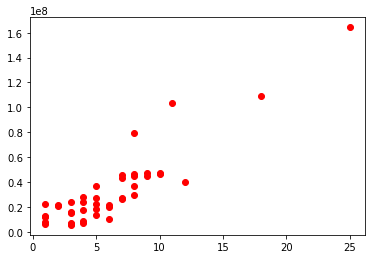

In [ ]:
from matplotlib import pyplot

pyplot.scatter(rep_count, rep_imp, c='red')
pyplot.show()

In [ ]:
corr_r = pearsonr(rep_count, rep_imp)
spearmann_r = spearmanr(rep_imp, rep_count)

corr_r


(0.899972998936821, 2.254533508937852e-16)

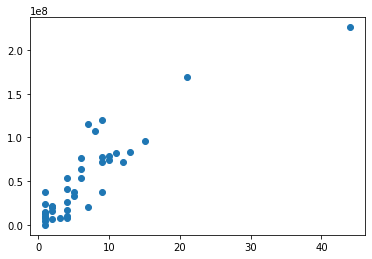

In [ ]:
pyplot.scatter(dem_count, dem_imp)
pyplot.show()

In [ ]:
corr_d = pearsonr(dem_count, dem_imp)
spearmann_r = spearmanr(rep_imp, rep_count)
corr_d

(0.8867498773498859, 5.529514619814712e-15)